In [1]:
import matplotlib.pyplot as plt

In [ ]:
# %matplotlib widget

In [2]:
import numpy as np
import os
from astropy.table import Table,hstack,vstack

In [3]:
import seaborn as sb
import pandas as pd
from scipy import stats

In [4]:
from collections import OrderedDict
# from quickreduce_funcs import digest_filenumbers
# from create_merged_target_list import create_mtl
#
# import configparser

In [5]:
corcut = 0.3
catalog_loc = "/Users/kremin/M2FSdata/Final_Values"
cat_name = 'full_dataset_table.csv'
# catalog_loc = '../data/catalogs/merged_target_lists/'

In [11]:
spectra_loc = os.path.join(catalog_loc,'Final_Combined_Specs')
target_lists_loc = os.path.join(catalog_loc,'Final_mtls_and_mtlzs')
redshifts_loc = os.path.join(catalog_loc,'Final_Redshifts')

In [12]:
if cat_name.split('.')[-1] == 'csv':
    typ = 'ascii.csv'
else:
    typ = cat_name.split('.')[-1]
tab = Table.read(os.path.join(catalog_loc,cat_name),format=typ)

In [33]:
snmin,snmax = -3.,18.
magmin,magmax = 16, 24.9
cormin,cormax = 0.,1.
outtab = tab.filled()
valid_sns = outtab[((outtab['SNavg']>=snmin)&(outtab['SNavg']<=snmax)&(outtab['MAG']<=magmax)&(outtab['MAG']>=magmin)&
                    (outtab['cor']>=cormin)&(outtab['cor']<=cormax))]
# valid_sns = valid_sns.to_pandas()

In [39]:
mask_by_row_all = np.array([id.split('-')[0] for id in tab['TARGETID']])
masks = np.unique(mask_by_row_all)
mask_by_row_valid = np.array([id.split('-')[0] for id in valid_sns['TARGETID']])


print('Masks :\t',len(masks))
mask_selectors = OrderedDict()
mask_selectors_sel = OrderedDict()
# mask_selectors = OrderedDict()
for mask in masks:
    mask_selectors[mask] = mask_by_row_all == mask
    mask_selectors_sel[mask] = mask_by_row_valid == mask

    ngoodall = np.sum(mask_selectors[mask])
    ngoodsel = np.sum(mask_selectors_sel[mask])
    print(mask,':\tall ngals=',ngoodall)
    print(mask,':\tnvalids gals=',ngoodsel)
#     if ngoodsel< ngoodall:
#         alltargmatch = tab[mask_selectors[mask]]
#         validtargmatch = valid_sns[mask_selectors_sel[mask]]
#         targs = []
#         for targ in alltargmatch:
#             if targ['TARGETID'] not in validtargmatch['TARGETID']:
#                 targs.append(targ)
#         var = Table(rows=targs,names=validtargmatch.colnames)
#         var.show_in_browser()
    #     mask_selectors[mask] = mask_by_row == mask
        

Masks :	 21
A02 :	all ngals= 170
A02 :	nvalids gals= 170
A04 :	all ngals= 185
A04 :	nvalids gals= 184
A07 :	all ngals= 154
A07 :	nvalids gals= 153


C:\Users\kremin\Anaconda3\lib\site-packages\astropy\table\np_utils.py:191: UserWarning: Warning: converting a masked element to nan.
  array_list = [np.array(obj[..., i].tolist()) for i in range(nfields)]


A09 :	all ngals= 108
A09 :	nvalids gals= 104
A10 :	all ngals= 121
A10 :	nvalids gals= 120
A11 :	all ngals= 185
A11 :	nvalids gals= 185
A20 :	all ngals= 207
A20 :	nvalids gals= 204
A21 :	all ngals= 244
A21 :	nvalids gals= 243
A22 :	all ngals= 244
A22 :	nvalids gals= 244
A23 :	all ngals= 244
A23 :	nvalids gals= 244
A26 :	all ngals= 217
A26 :	nvalids gals= 216
B02 :	all ngals= 102
B02 :	nvalids gals= 81
B04a :	all ngals= 198
B04a :	nvalids gals= 198
B04b :	all ngals= 193
B04b :	nvalids gals= 181
B05 :	all ngals= 187
B05 :	nvalids gals= 187
B06 :	all ngals= 236
B06 :	nvalids gals= 235
B07 :	all ngals= 245
B07 :	nvalids gals= 245
B08 :	all ngals= 243
B08 :	nvalids gals= 243
B09 :	all ngals= 226
B09 :	nvalids gals= 226
B10 :	all ngals= 226
B10 :	nvalids gals= 226
B11 :	all ngals= 183
B11 :	nvalids gals= 182


In [21]:
Table?

Init signature:
Table(
    data=None,
    masked=None,
    names=None,
    dtype=None,
    meta=None,
    copy=True,
    rows=None,
    copy_indices=True,
    **kwargs,
)
Docstring:     
A class to represent tables of heterogeneous data.

`~astropy.table.Table` provides a class for heterogeneous tabular data,
making use of a `numpy` structured array internally to store the data
values.  A key enhancement provided by the `~astropy.table.Table` class is
the ability to easily modify the structure of the table by adding or
removing columns, or adding new rows of data.  In addition table and column
metadata are fully supported.

`~astropy.table.Table` differs from `~astropy.nddata.NDData` by the
assumption that the input data consists of columns of homogeneous data,
where each column has a unique identifier and may contain additional
metadata such as the data unit, format, and description.

See also: http://docs.astropy.org/en/stable/table/

Parameters
----------
data : numpy ndarray, dict,

In [10]:
tab.colnames

['FIBERNUM',
 'redshift_est',
 'cor',
 'template',
 'SNavg',
 'SNHKmin',
 'HSN',
 'KSN',
 'GSN',
 'RA',
 'DEC',
 'SDSS_zsp',
 'sdss_zph',
 'sdss_rmag',
 'MAG',
 'z',
 'z_est_helio',
 'z_clust_lit',
 'R [asec]',
 'Proj_R_Comoving_Mpc',
 'v [km/s]',
 'SDSS_only',
 'TARGETID',
 'SDSS12_OBJID',
 'RA_targeted',
 'DEC_targeted',
 'sdss_RA_ICRS',
 'sdss_DE_ICRS',
 'sdss_mode',
 'sdss_q_mode',
 'sdss_class',
 'sdss_m_SDSS12',
 'sdss_ObsDate',
 'sdss_Q',
 'sdss_umag',
 'sdss_e_umag',
 'sdss_gmag',
 'sdss_e_gmag',
 'sdss_e_rmag',
 'sdss_imag',
 'sdss_e_imag',
 'sdss_zmag',
 'sdss_e_zmag',
 'sdss_e_zph',
 'sdss___zph_',
 'TYPE',
 'EPOCH']

C:\Users\kremin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


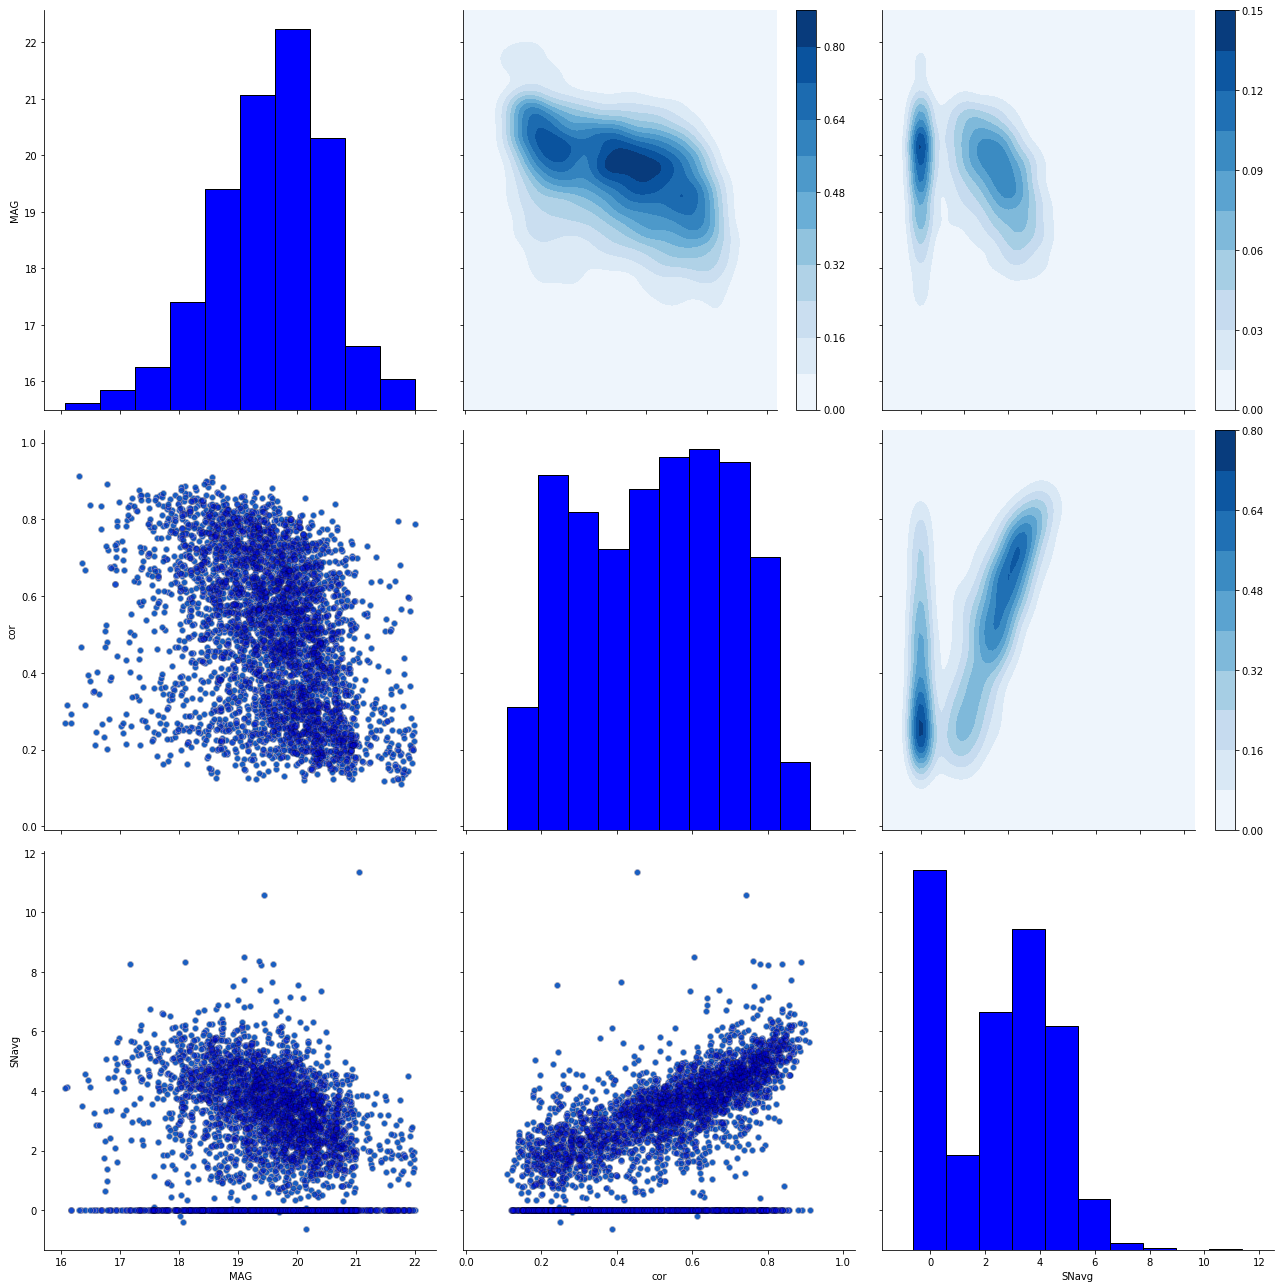

In [35]:
plt.close('all')
params = ['MAG','cor','SNavg']
#vars=params, hue = 'MAG',
grid = sb.pairplot(valid_sns[params].to_pandas(), size = 6)

# Map a scatter plot to the upper triangle
grid = grid.map_lower(plt.scatter, color = 'blue', alpha=0.2,edgecolor= 'k')
# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'blue', 
                     edgecolor = 'k')
# Map a density plot to the lower triangle
grid = grid.map_upper(sb.kdeplot, cmap="Blues", shade=True,shade_lowest=True,cbar=True)



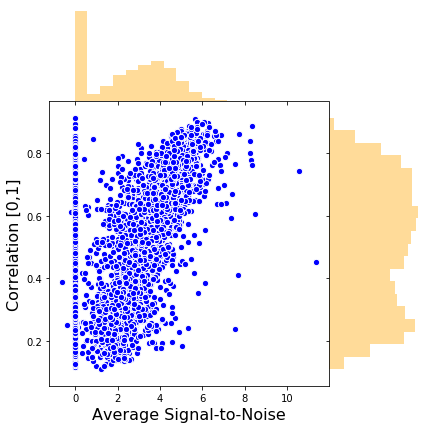

C:\Users\kremin\Anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


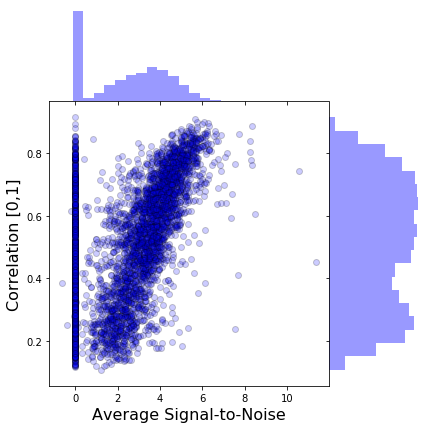

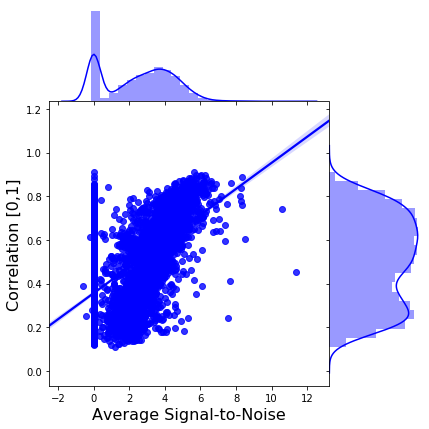

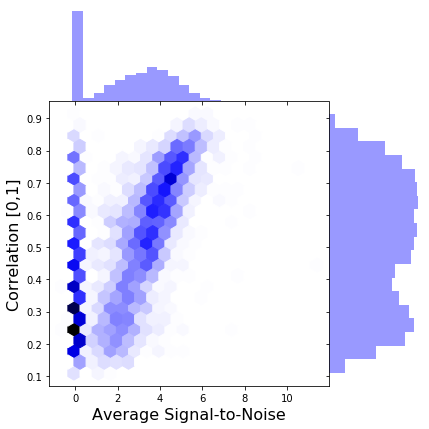

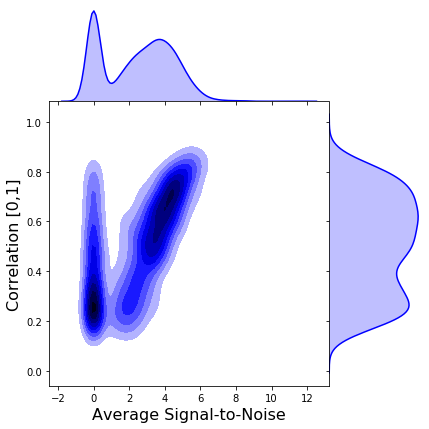

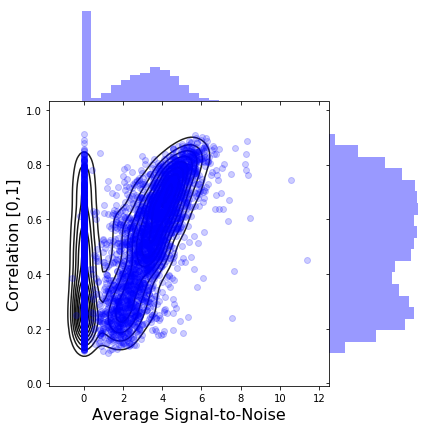

In [37]:
plt.close('all')



size, fontsize = 6, 12
numbins,ratio = 20, 3
keyword_args = {'x':"SNavg", 'y':"cor", 'data':valid_sns.to_pandas(),'height':size,'ratio':ratio, 'space':0}

g = sb.JointGrid(**keyword_args)
g = g.plot_joint(plt.scatter,
                  color="b", s=40, edgecolor="white")
g = g.plot_marginals(sb.distplot, kde=False, color="orange",bins=numbins)
g = g.set_axis_labels('Average Signal-to-Noise', 'Correlation [0,1]',size=16)
plt.show()

keyword_args['color'] = 'b'

g = sb.jointplot(alpha=0.2, **keyword_args,edgecolor='k')
g = g.set_axis_labels('Average Signal-to-Noise', 'Correlation [0,1]',size=16)
# g = g.annotate(stats.pearsonr)

g = sb.jointplot(kind="reg",**keyword_args)
g = g.set_axis_labels('Average Signal-to-Noise', 'Correlation [0,1]',size=16)

g = sb.jointplot(kind="hex",**keyword_args)
g = g.set_axis_labels('Average Signal-to-Noise', 'Correlation [0,1]',size=16)

g = sb.jointplot(kind="kde", shade=True,shade_lowest=False,edgecolor='k',**keyword_args)
g = g.set_axis_labels('Average Signal-to-Noise', 'Correlation [0,1]',size=16)

g = (sb.jointplot(alpha=0.2, **keyword_args)
        .plot_joint(sb.kdeplot, zorder=0, shade=False,n_levels=10,color='k'))
g = g.set_axis_labels('Average Signal-to-Noise', 'Correlation [0,1]',size=16)

In [45]:

def generate_plot_examples(intab,xcol,ycol,xname,yname,title):
    plt.close('all')

    snmin,snmax = 0.,18.
    magmin,magmax = 16, 24.9
    cormin,cormax = 0.,1.
    params = [xcol,ycol]
    outtab = intab.filled()
    valid_sns = outtab[((outtab['SNavg']>snmin)&(outtab['SNavg']<snmax)&(outtab['MAG']<magmax)&(outtab['MAG']>magmin)&
                        (outtab['cor']>cormin)&(outtab['cor']<cormax))]
    valid_sns = valid_sns[params].to_pandas()

    size = 6
    numbins,ratio = 20, 3
    xlab,ylab = xname, yname
    fontsize, titlesize = 16, 20
    title_fracshift = 1.04
    keyword_args = {'x':xcol, 'y':ycol, 'data':valid_sns,'height':size,'ratio':ratio, 'space':0}

    g = sb.JointGrid(**keyword_args)
    g = g.plot_joint(plt.scatter,
                      color="b", s=40, edgecolor="white")
    g = g.plot_marginals(sb.distplot, kde=False, color="orange",bins=numbins)
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()
    
    
    g = sb.JointGrid(**keyword_args)
    g = g.plot_joint(plt.scatter,
                      color="b", s=40, edgecolor="white")    
    _ = g.ax_marg_x.hist(keyword_args['data'][xcol], color="orange", alpha=.6,
                      bins=numbins)
    _ = g.ax_marg_y.hist(keyword_args['data'][ycol], color="r", alpha=.6,
                      orientation="horizontal",
                      bins=numbins)
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()
    
    keyword_args['color'] = 'b'

    g = sb.jointplot(alpha=0.2, **keyword_args,edgecolor='k')
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()
    # g = g.annotate(stats.pearsonr)

    g = sb.jointplot(kind="reg",**keyword_args)
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()

    g = sb.jointplot(kind="hex",**keyword_args)
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()

    g = sb.jointplot(kind="kde", shade=True,shade_lowest=False,edgecolor='k',**keyword_args)
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()

    g = (sb.jointplot(alpha=0.2, **keyword_args)
            .plot_joint(sb.kdeplot, zorder=0, shade=False,n_levels=2*int(np.ceil(np.log10(len(keyword_args['data'])))),color='k'))
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()

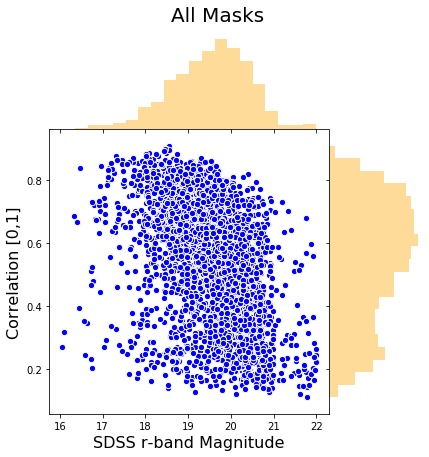

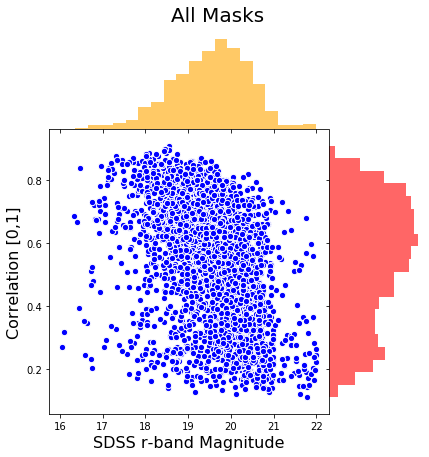

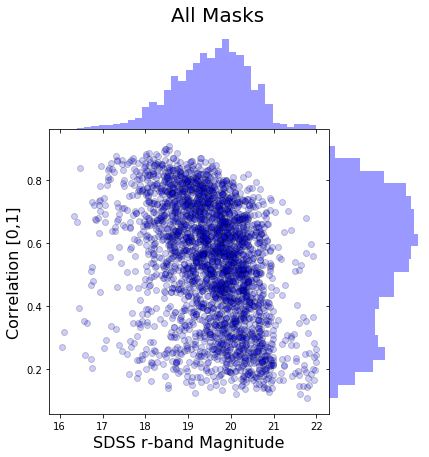

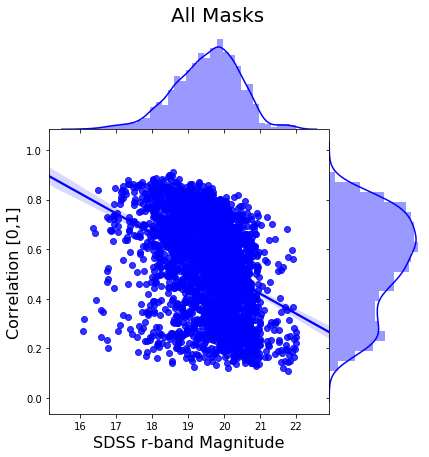

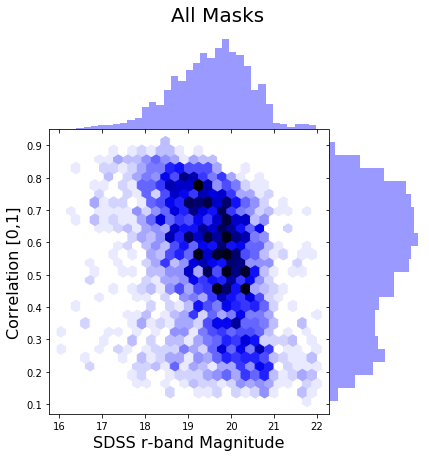

C:\Users\kremin\Anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


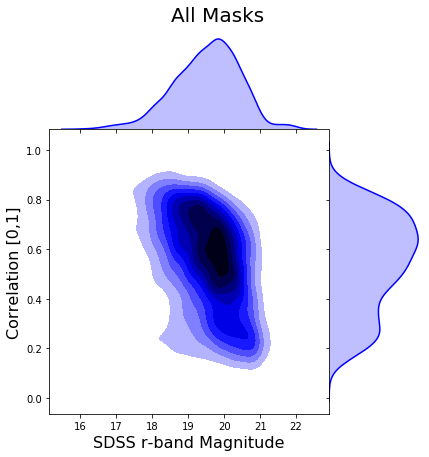

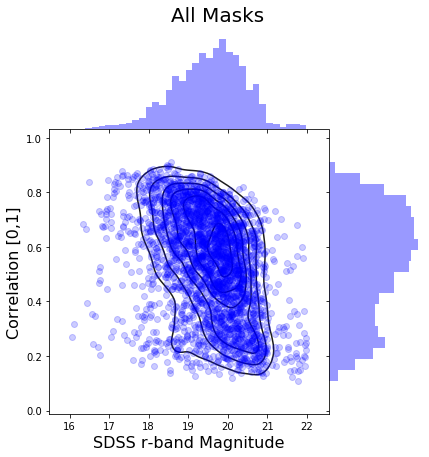

In [46]:
generate_plot_examples(tab, "MAG", "cor",'SDSS r-band Magnitude', 'Correlation [0,1]','All Masks')
# 'SNavg' 'Average Signal-to-Noise'

14.384999999999984
0.0
0.0
0.0
0.0
0.0
154.77499999999998
0.0
202.387
0.0
212.837
0.0
0.0
0.0
11.838999999999974
16.09599999999995
15.861000000000018
20.281000000000006
18.44099999999999
13.789000000000001
38.433999999999976


C:\Users\kremin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


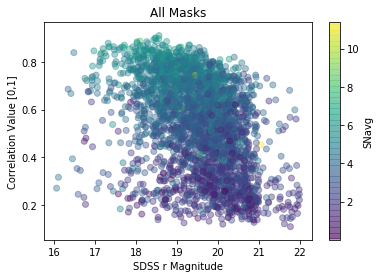

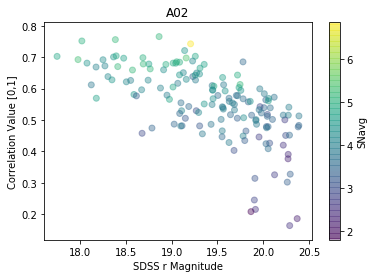

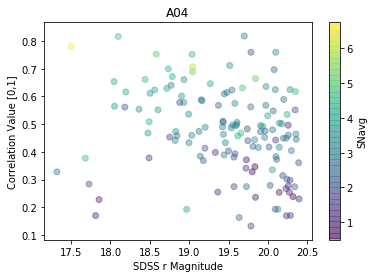

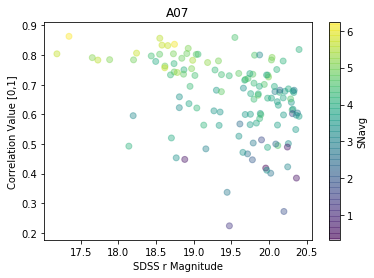

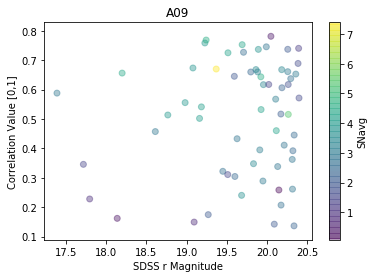

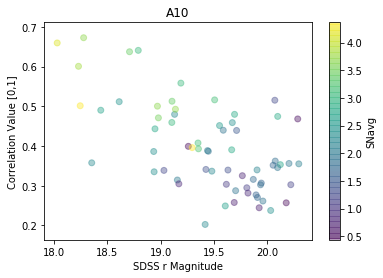

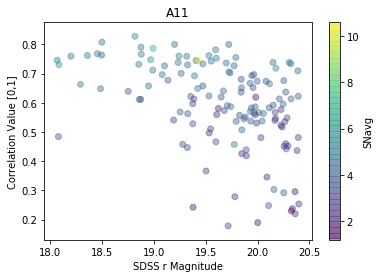

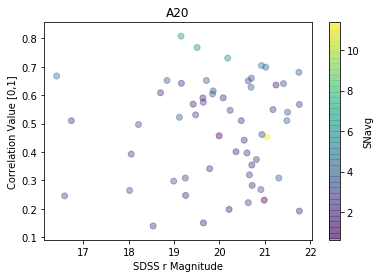

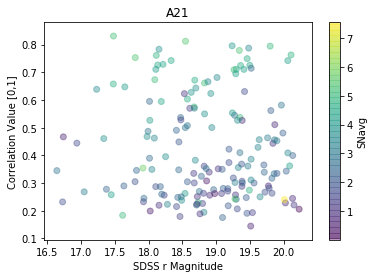

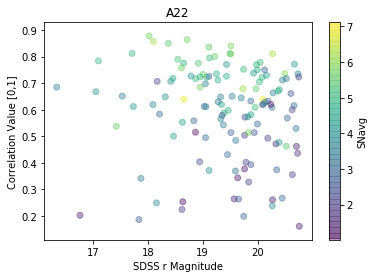

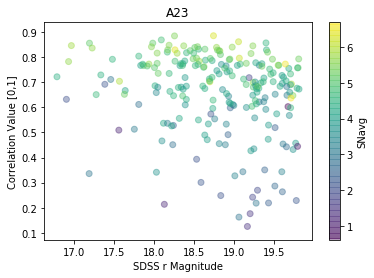

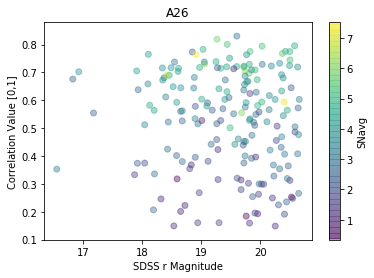

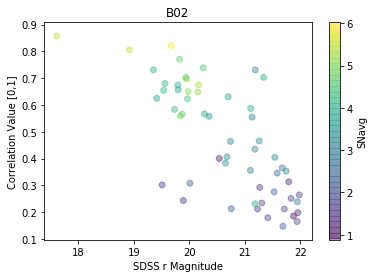

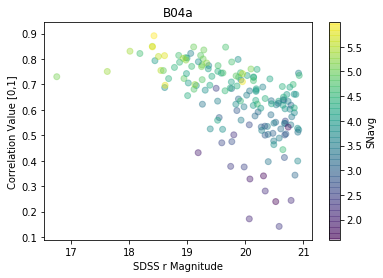

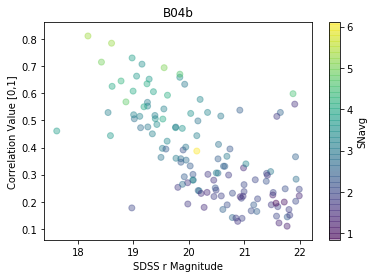

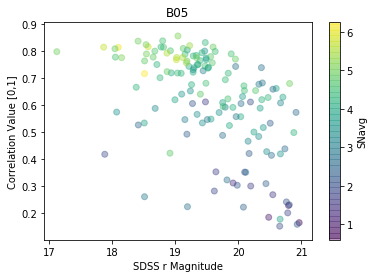

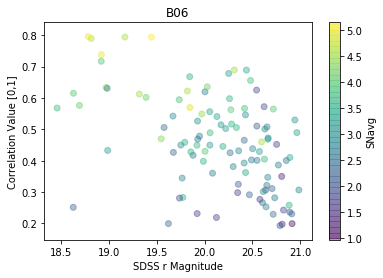

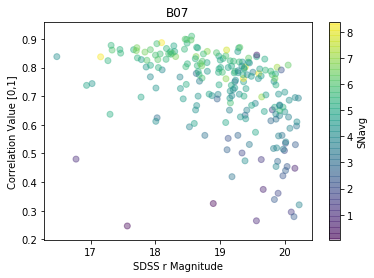

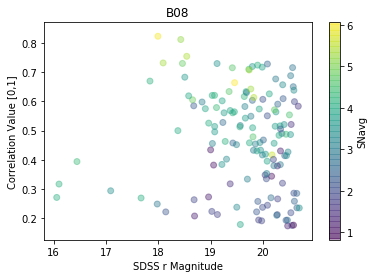

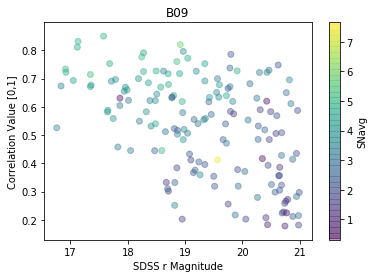

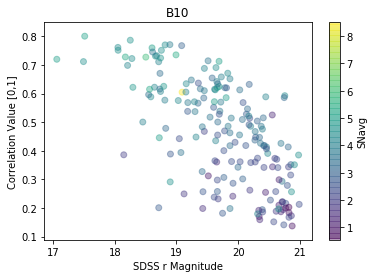

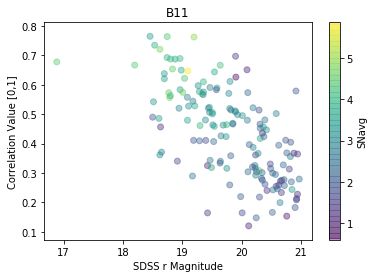

In [41]:
plt.close('all')

def make_mag_cor_sn_plot(intab,tabname):
    valids = intab[intab['SNavg']>0]
    plt.figure()
    plt.scatter(valids['MAG'],valids['cor'],c=valids['SNavg'],alpha=0.4)
    plt.colorbar(label='SNavg')
    plt.xlabel('SDSS r Magnitude')
    plt.ylabel("Correlation Value [0,1]")
    plt.title(tabname)

make_mag_cor_sn_plot(valid_sns,"All Masks")

for mask,masklocs in mask_selectors_sel.items():
    maskonly_tab = valid_sns[masklocs]
    magdiffs = np.abs(maskonly_tab['MAG']-maskonly_tab['sdss_rmag'])
    print(np.sum(magdiffs[magdiffs<100.]))
    make_mag_cor_sn_plot(maskonly_tab,mask)

14.384999999999984
0.0
0.0
0.0
0.0
0.0
154.77499999999998
0.0
202.387
0.0
212.837
0.0
0.0
0.0
11.838999999999974
16.09599999999995
15.861000000000018
20.281000000000006
18.44099999999999
13.789000000000001
38.433999999999976


C:\Users\kremin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


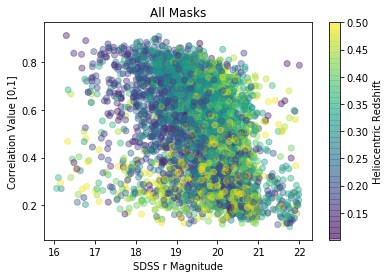

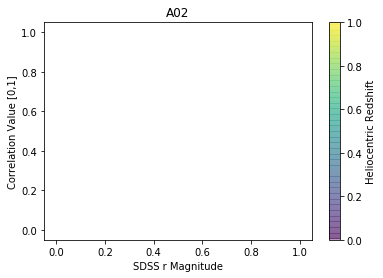

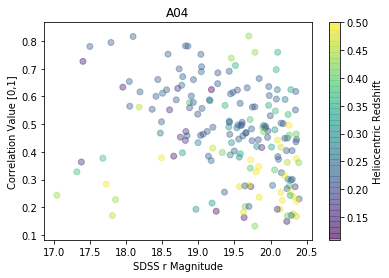

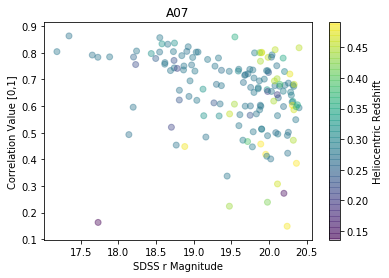

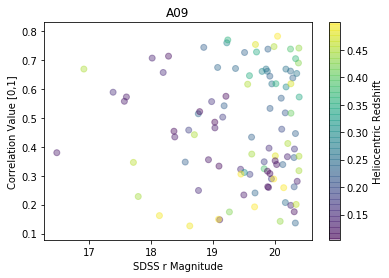

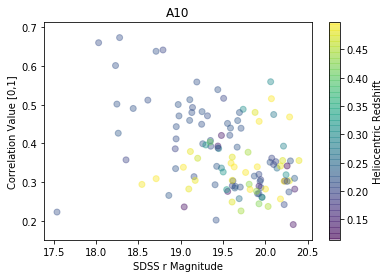

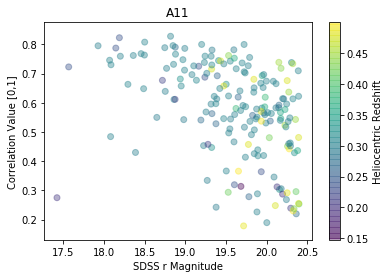

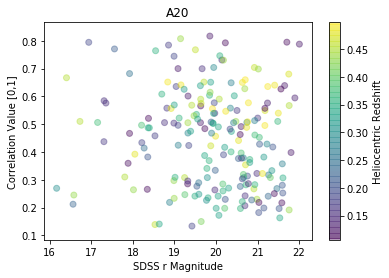

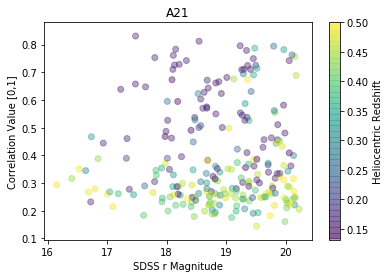

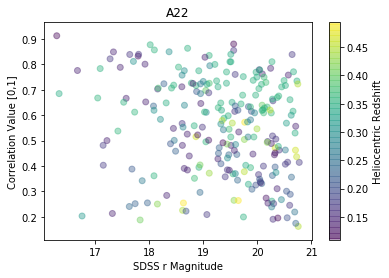

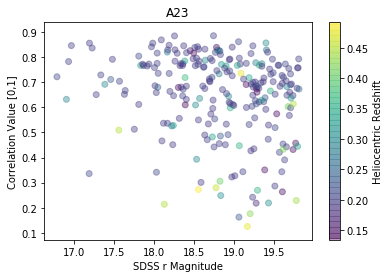

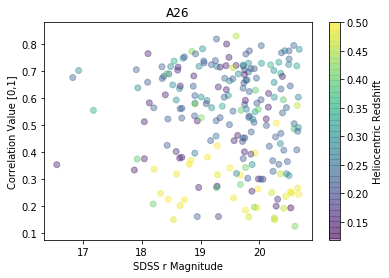

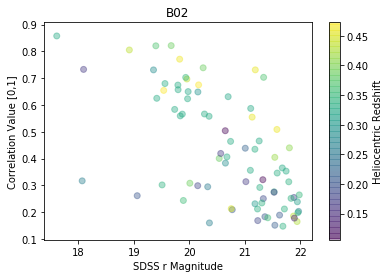

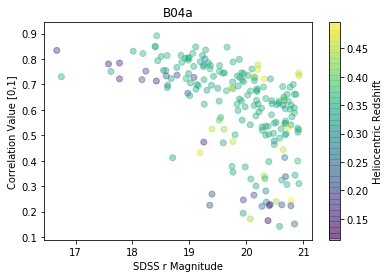

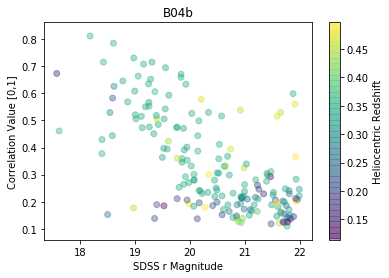

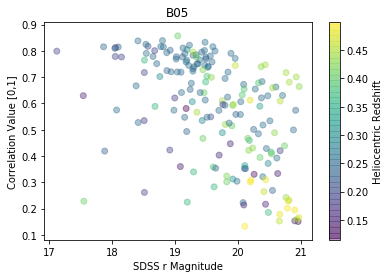

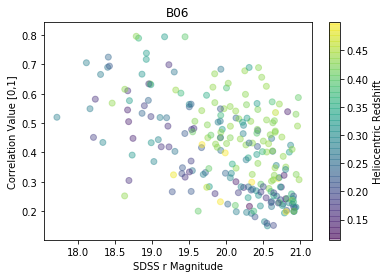

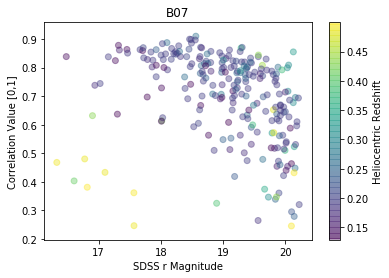

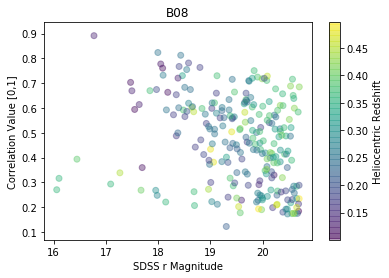

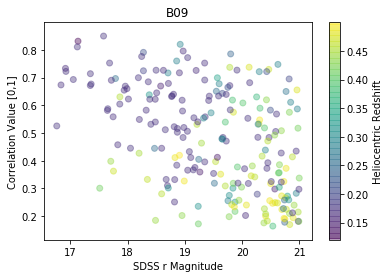

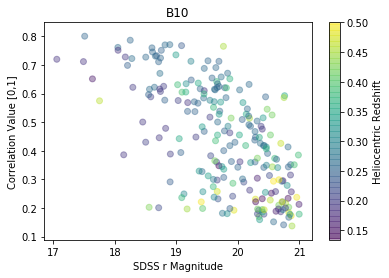

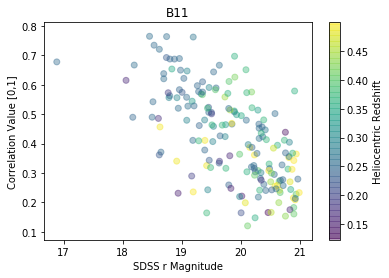

In [43]:
plt.close('all')

def make_mag_cor_z_plot(intab,tabname):
    valids = intab[intab['z_est_helio']< 1.]
    plt.figure()
    plt.scatter(valids['MAG'],valids['cor'],c=valids['z_est_helio'],alpha=0.4)
    plt.colorbar(label='Heliocentric Redshift')
    plt.xlabel('SDSS r Magnitude')
    plt.ylabel("Correlation Value [0,1]")
    plt.title(tabname)

make_mag_cor_z_plot(valid_sns,"All Masks")

for mask,masklocs in mask_selectors_sel.items():
    maskonly_tab = valid_sns[masklocs]
    magdiffs = np.abs(maskonly_tab['MAG']-maskonly_tab['sdss_rmag'])
    print(np.sum(magdiffs[magdiffs<100.]))
    make_mag_cor_z_plot(maskonly_tab,mask)

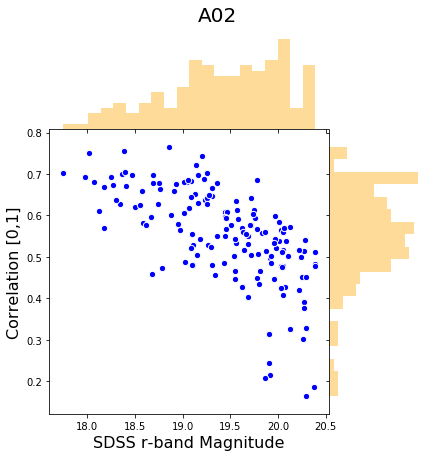

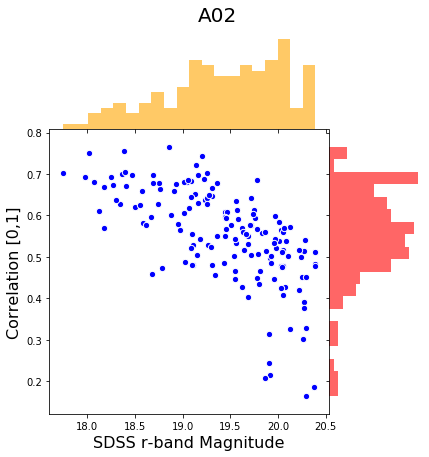

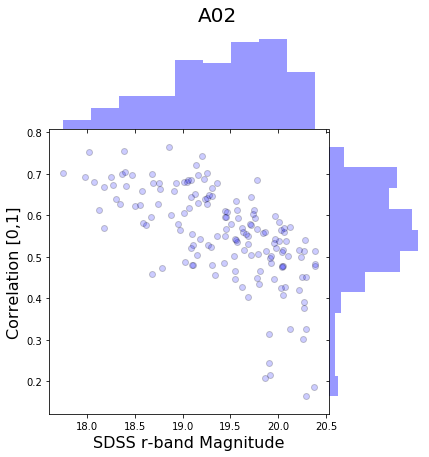

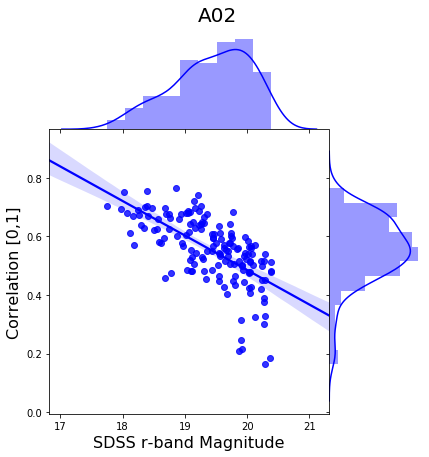

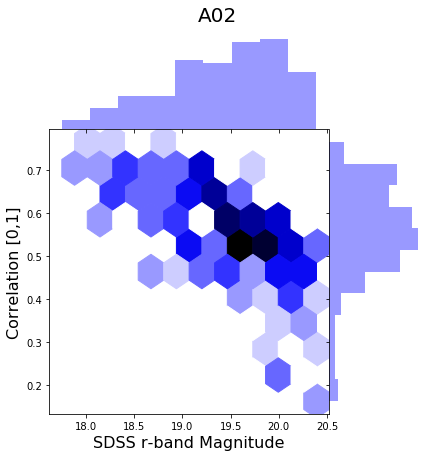

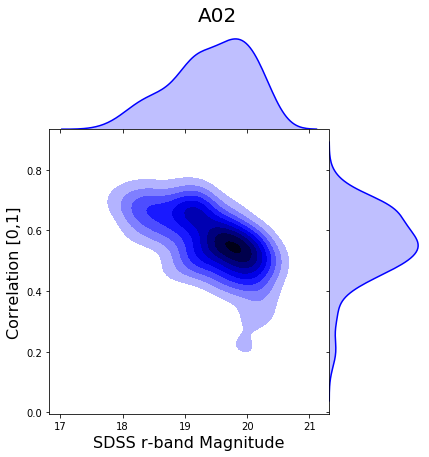

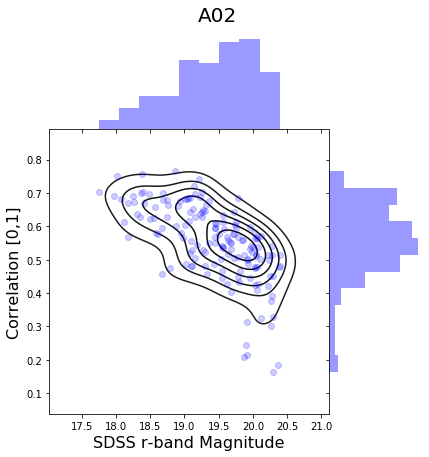

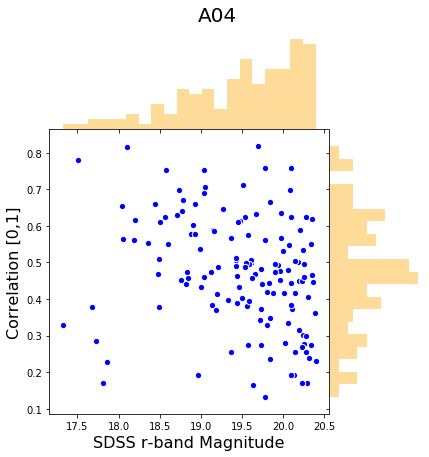

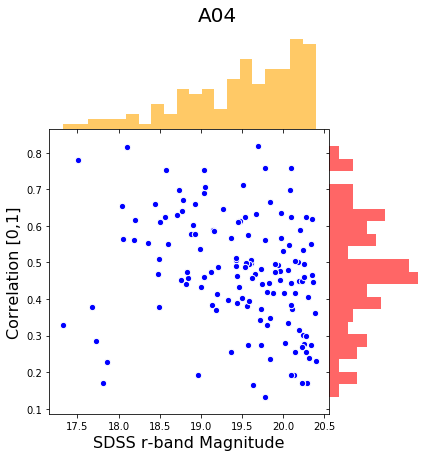

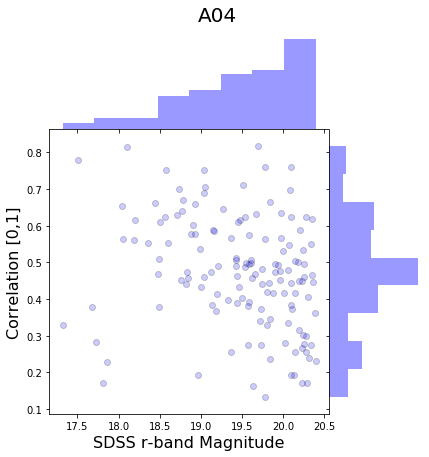

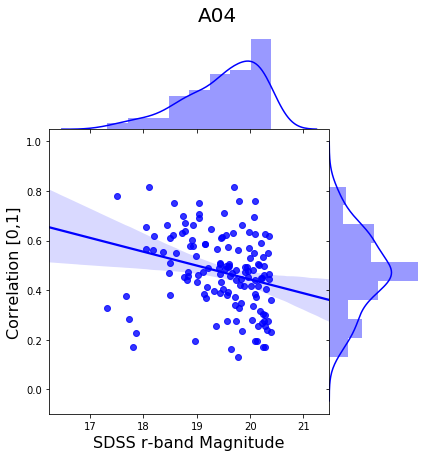

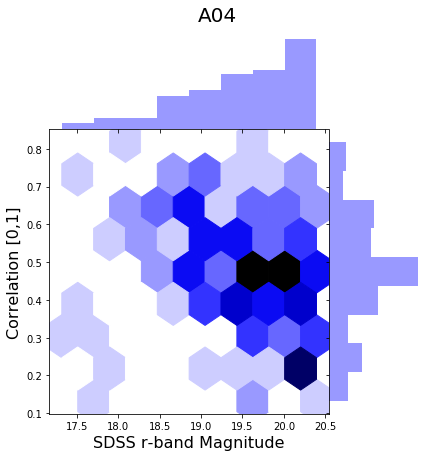

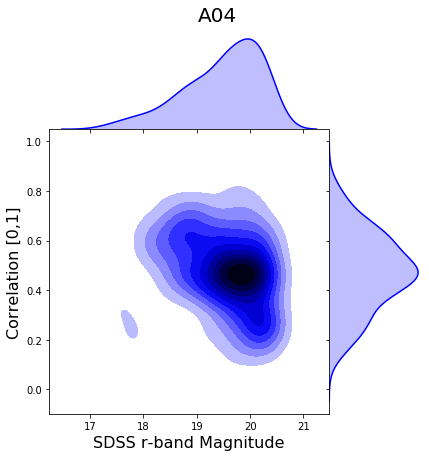

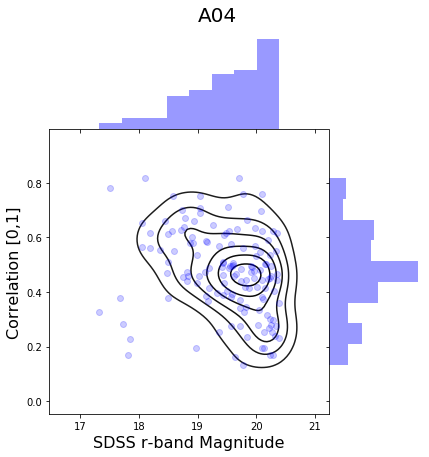

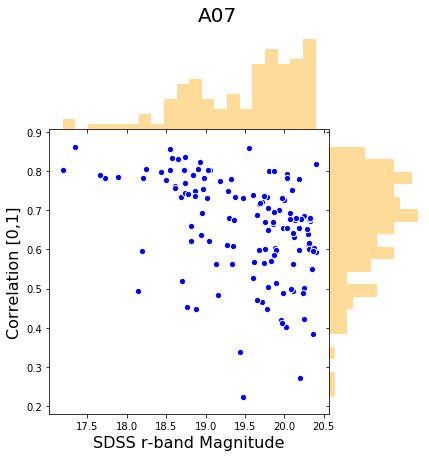

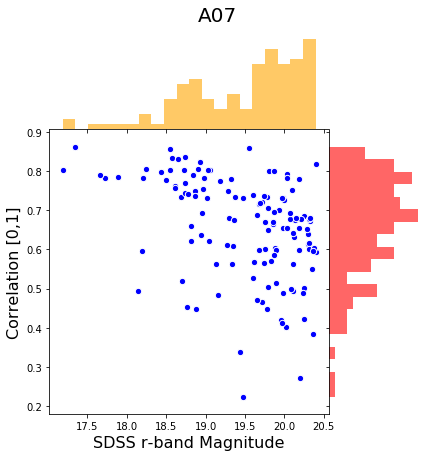

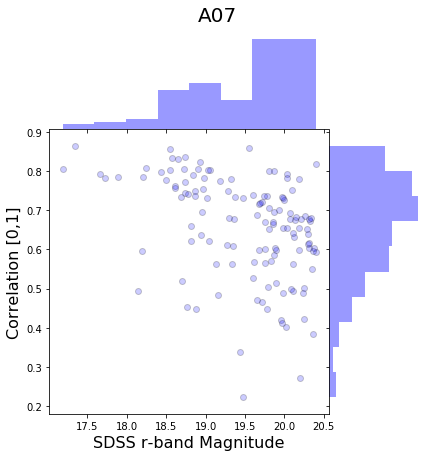

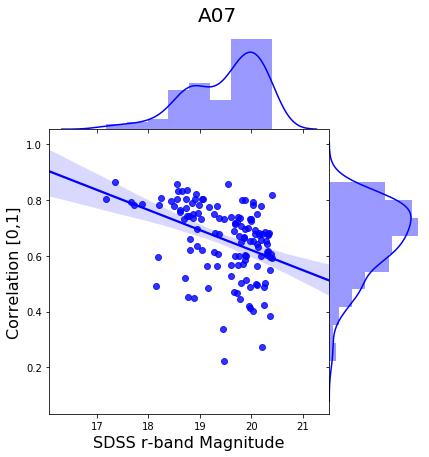

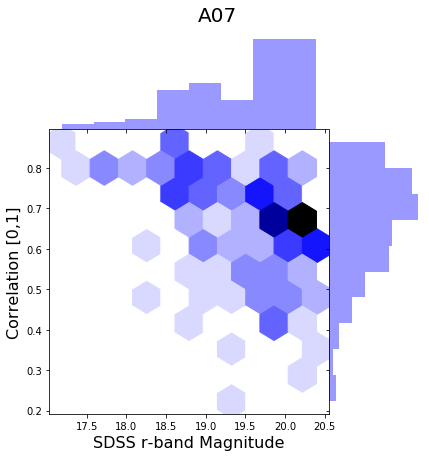

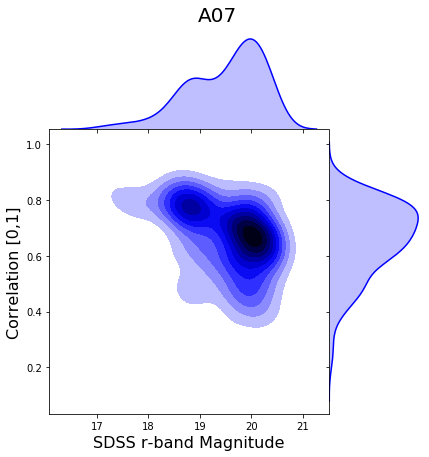

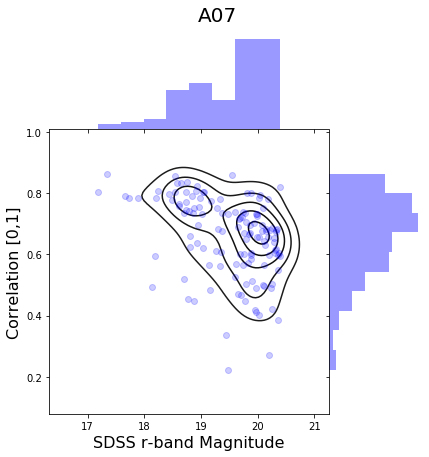

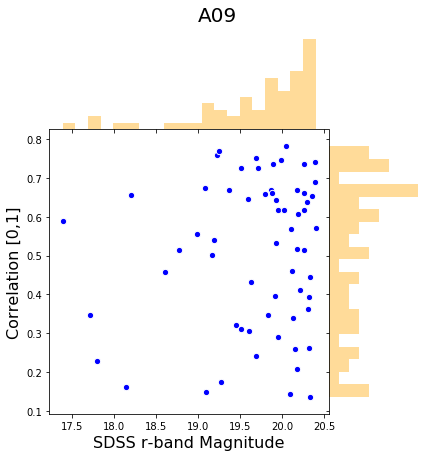

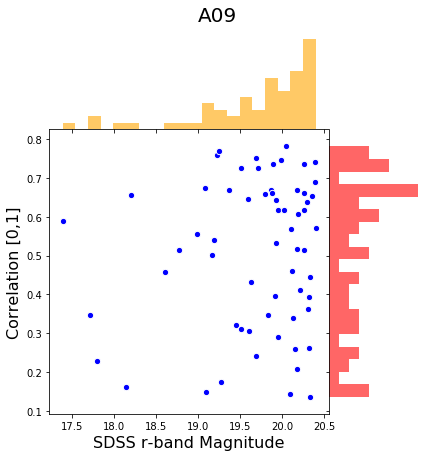

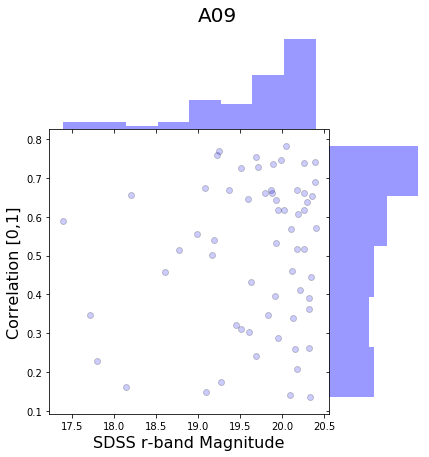

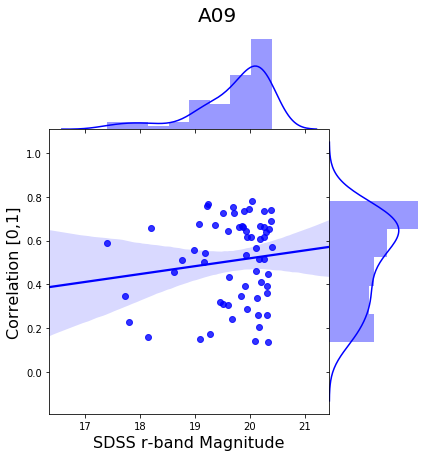

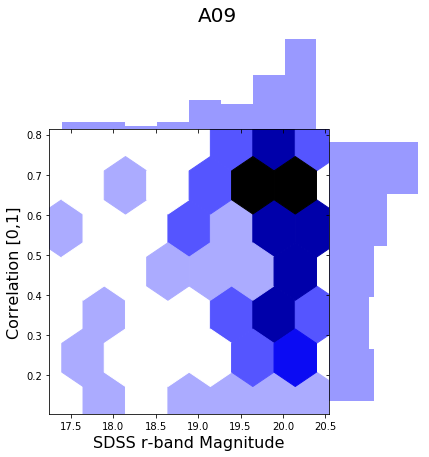

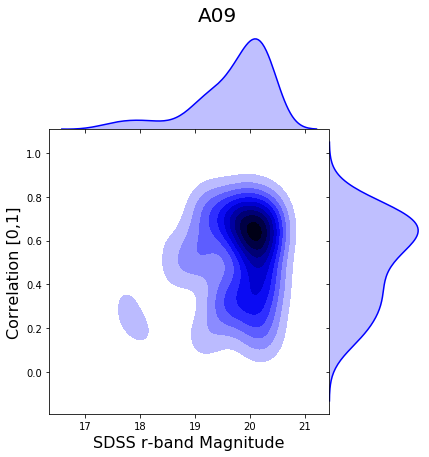

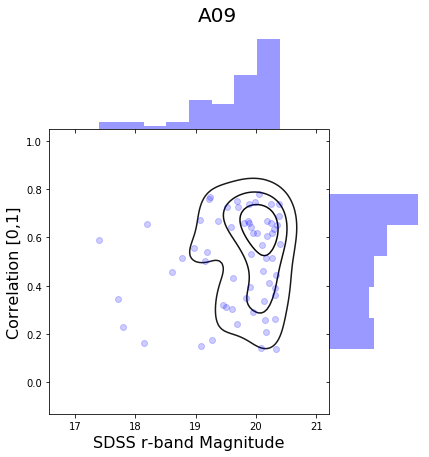

In [47]:
x,y="MAG", "cor"
xnam,ynam = 'SDSS r-band Magnitude', 'Correlation [0,1]'
ii = 0
for mask,masklocs in mask_selectors_sel.items():
    maskonly_tab = valid_sns[masklocs]
    generate_plot_examples(maskonly_tab,x,y,xnam,ynam,mask)
    ii += 1
    if ii > 3:
        break